In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
webpage = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')

In [3]:
soup = BeautifulSoup(webpage.content,'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

In [4]:
rating_tag =soup.find_all(attrs={"class": "Rating"})

In [5]:
rating = []
for rate in rating_tag[1:]:
    rating.append(float(rate.get_text()))

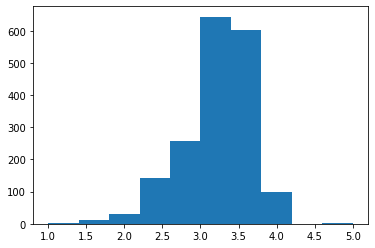

In [6]:
plt.hist(rating)
plt.show()

In [7]:
Companies = soup.select(".Company")
Companies_Name = []
for name in Companies[1:]:
 Companies_Name.append(name.get_text())

In [8]:
df = pd.DataFrame.from_dict({"Company": Companies_Name, "Rating": rating})

In [9]:
mean_rating = df.groupby('Company').Rating.mean()
Top_10 = mean_rating.nlargest(10)
print(Top_10)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


In [10]:
cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")

for td in cocoa_percent_tags[1:]:
  percent = int(float(td.get_text().strip('%')))
  cocoa_percents.append(percent)

In [11]:
company_rating = {'Company Name': Companies_Name, 'Rating': rating, 'CocoaPercentage': cocoa_percents}
company_rating_df = pd.DataFrame.from_dict(company_rating)

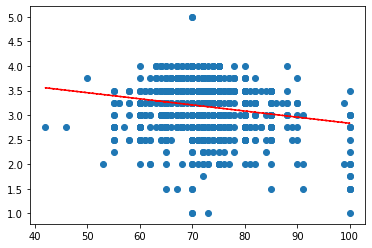

In [15]:
plt.clf()
plt.scatter(company_rating_df.CocoaPercentage, company_rating_df.Rating)
z= np.polyfit(company_rating_df.CocoaPercentage, company_rating_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(company_rating_df.CocoaPercentage, line_function(company_rating_df.CocoaPercentage), "r--")
plt.show()